Для любых видео восстановить траекторию движения (t вектор). Выполнить визуализацию. 
Определить параметры которые влияют на "точность" определения вектора t
Использовать решение на базе нейронных сетей. 
Любые идеи. 

***slam прикрутить. 
Видео 1 но что бы работало.    

***
Анализ задания и пути решения:

Грузим из интернета качественное видео полета дрона. Сохраняем кусок не менее 2 мин.
Анализируем с помощью детектора sift в отдельном файле ipynb.
Анализируем с помощью детектора orb в отдельном файле ipynb.
Анализируем с помощью нейронной сети kornia в отдельном файле ipynb.
В каждом файле выводим траектории на трехмерный график и сохраняем.
При анализе используем различные промежутки между анализируемыми кадрами (скажем, кажый пятый или каждый десятый кадр).
Используем два метода  расчета эссенциальной матрицы: cv2.LMEDS и cv2.RANSAC.
Фиксируем время расчета.

Полученные результаты заносим в таблицу csv.
Выводим в таблице рассчитанные нами данные:

In [1]:
import pandas as pd
final_table = pd.read_csv('Results.csv', sep = ";")
display(final_table)

,S/N,Detector,Method,"Interval, frames","Calc. time, s",Quality
0,1,SIFT,LMEDS,5,273.0,BAD
1,2,SIFT,LMEDS,10,140.0,GOOD
2,3,SIFT,LMEDS,15,95.0,GOOD
3,4,SIFT,LMEDS,20,70.0,GOOD
4,5,SIFT,RANSAC,5,259.0,BAD
5,6,SIFT,RANSAC,10,129.0,MEDIUM
6,7,SIFT,RANSAC,15,86.0,MEDIUM
7,8,SIFT,RANSAC,20,64.0,MEDIUM
8,9,ORB,LMEDS,5,20.0,BAD
9,10,ORB,LMEDS,10,11.0,BAD


Загрузим и продемнстрируем одну из картинок - результат расчета траектории дрона:

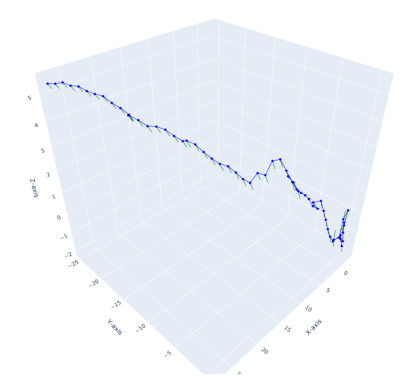

In [11]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('Trajectory.png')
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Выводы: с помощью детектора sift и orb проанализировали видеролик и рассчитали 3D-траекторию движения дрона и ориентацию его камеры.
Использовались такие методы расчета эссенциальной матрицы, как LMEDS и RANSAC.
На точность расчета в нашем случае влияет размер промежутка между кадрами, принимаемыми во внимание.
Так, если в рассмотрение принимался каждый пятый кадр, траектория выглядела неестественно изорванной.
При рассмотрении каждого десятого или двадцатого кадра траектория выглядит плавной.
Поскольку точная траектория неизвестна, а расчеты по разным методам дают визуально разные результаты, количественная оценка качества восстановления траектории невозможна. 
Поэтому в графе Quality таблицы выше мы указывали визуально оцениваемое качество по трехбалльной шкале: BAG, MEDIUM, GOOD. При такой оценке качества принимались во внимание плавность линии,  наличие и количество резких поворотов, изломов и "разрывов" траектории.
Как показывает таблица выше, метод расчета эссенциальной матрицы LMEDS дает в среднем лучшие результаты, чем RANSAC. При этом второй метод оказывается совсем незначительно быстрее.
Если рассматривать разницу между детекторами ключевых точек, то метод sift оказывается на порядок более медленным, но и более точным, чем метод orb. Однако у метода orb есть свое преимущество - на относительно старом процессоре (вышедший около 15 лет назад Phenom II X6 с частотой в разгоне 3.2 ГГц) скорость расчета почти не отличается от расчета на современном i3-12100 c частотой ~4 ГГц, в то время как метод sift значительно теряет в скорости (в таблице выше показано время счета на i3-12100).
Нами была также предпринята попытка в отдельном файле реализовать расчет ключевых точек и их сопоставление с помощью нейросети (модуль kornia). На данный момент код не заработал, хотя вроде бы должен был. Поэтому мы продолжим работу над этим расчетом в отдельном файле и добавим результаты в репозиторий позже.

---